# Titanic: Machine Learning from Disaster
This Machine learning program is based on the dataset of famous Titanic incident.Objective is to predict classification- survival or deceased. The dataset is obtained from kaggle, we will be doing exploratory data analysis(EDA) followed by different machine learning techniques. 

Let's begin!!!!

Import Libraries

Let's import some libraries to get started!

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv(r'C:\Users\deepak\Desktop\Data Science\Kaggle\Titanic\titanic kaggle\train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()  ## To check null values in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Exploratory Data Analysis

Let's begin some exploratory data analysis. As we can see there are missing(NaN)and categorical values present in our data, we need to take care of following columns:
'Name', 'Sex', 'Cabin', Embarked. 
We will explore other columns as well to make sure our final data is best suited to provide good effciency while using machine learning algorithms.

We'll start by checking out missing data!


# Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

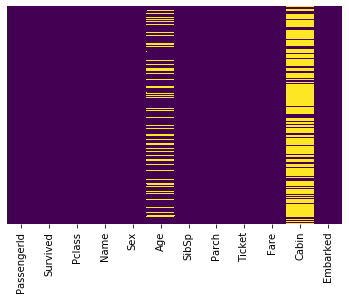

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see there are lot of null values in 'Age' and 'Cabin' column. We need to replace these null values or drop the entire column, as we can see there are lot of null values in 'Cabin' column. These are the two options we have, let's explore data more.

## Handling Null values in 'Age' column. Let's visualize 'Age' data through different plots

In [6]:
train['Age'].isnull().sum()

177

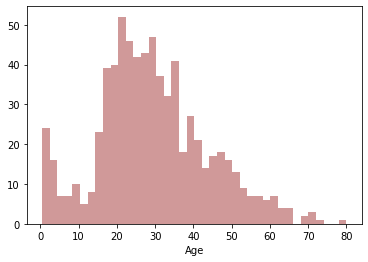

In [12]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

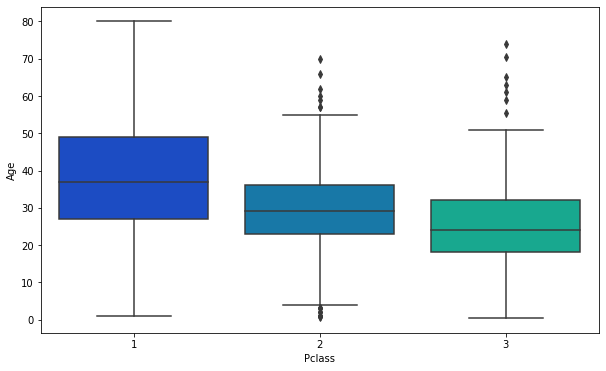

In [13]:
## boxplot of 'Age' with respect to 'Pclass' column
plt.figure(figsize= (10,6))
sns.boxplot(x='Pclass',y='Age',data=train, palette='winter' )

In [7]:
Avg_age= train['Age'].mean()
Std_age= train['Age'].std()
Null_age= train['Age'].isnull().sum()

In [9]:
print(Avg_age)
print(Std_age)
print(Null_age)

29.69911764705882
14.526497332334044
177


In [14]:
Null_random_values_age= np.random.randint(Avg_age-Std_age,Avg_age+Std_age, size= Null_age) ##Fitting the rando values from (~15 to~44 in 177 null values)
print(Null_random_values_age)

[33 16 30 24 28 43 28 32 22 26 40 24 21 38 41 29 30 41 27 30 21 15 33 21
 15 24 38 17 20 34 43 34 32 43 16 27 16 22 32 22 41 18 26 17 41 31 16 31
 26 23 29 17 34 15 31 20 34 18 32 43 43 17 34 29 37 26 35 40 23 27 26 31
 18 29 16 23 39 22 15 34 17 24 36 34 22 35 21 40 36 33 29 21 33 28 40 37
 43 19 16 16 32 35 32 15 24 37 41 15 40 21 35 30 24 24 27 15 26 42 26 25
 26 28 31 35 38 30 25 27 26 43 16 40 27 32 30 22 37 23 29 27 20 31 42 21
 17 24 38 33 41 37 26 41 37 30 42 32 43 24 24 23 19 20 18 29 20 41 26 16
 23 39 34 37 37 19 37 28 28]


In [16]:
train[np.isnan(train['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [19]:
train.loc[np.isnan(train['Age']),'Age']= Null_random_values_age  ## values are replaced here

In [23]:
train['Age'].isnull().sum() ##checking null values now

0

In [24]:
## checking data types in our dataset
train.dtypes ##we can see 'Age' is float here. we need to change float into int

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
train['Age']= train['Age'].astype(int) ## converted "Age" values into 'int'

# Let's explore 'Cabin' column

In [26]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
##cabin is in object form
f1= lambda x: 0 if type(x)== float else 1 ##building a function to handle categorical values in 'Cabin'

In [30]:
train['New Cabin']=train['Cabin'].apply(f1)  ## 'New Cabin' is created

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


# Making a single column for Sibsp, parch and a person

In [32]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,1


## Embarked column has 2 null values, let's replace them with mode (value occuring the most)

In [34]:
train['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
train['Embarked'] = train['Embarked'].fillna('S')

In [59]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

# Sex column has categorical values, let's replace them and also convert into 'int'

In [60]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)## map is used to replace the values

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,0,NaN,0,0,2,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,3,C85,1,1,2,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,1,NaN,0,0,1,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,3,C123,0,1,2,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,1,NaN,0,0,1,1.0


# Fare column also has categorical values, let's replace them and also convert into 'int'

In [38]:
train.loc[train['Fare'] <= 7.91, 'Fare']= 0

In [39]:
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1

In [40]:
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']= 2

In [41]:
train.loc[train['Fare'] > 31, 'Fare']= 3

In [42]:
train['Fare'] = train['Fare'].astype(int)

In [44]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,0,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,3,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,1,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,3,C123,S,1,2


# Woking on 'Title Column'

In [47]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search('([A-Za-z]+\.)', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search[0]  

In [48]:
re.search('([A-Za-z]+\.)','Cumings Mrs. John  Bradley ')

<re.Match object; span=(8, 12), match='Mrs.'>

In [49]:
train['Title'] = train['Name'].apply(get_title)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,0,NaN,S,0,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,3,C85,C,1,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,1,NaN,S,0,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,3,C123,S,1,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,1,NaN,S,0,1,Mr.


In [51]:
train['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Col.           2
Major.         2
Sir.           1
Jonkheer.      1
Lady.          1
Countess.      1
Capt.          1
Mme.           1
Ms.            1
Don.           1
Name: Title, dtype: int64

In [52]:
train['Title'] = train['Title'].replace(['Lady.', 'Countess.','Capt.', 'Col.','Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss.')
train['Title'] = train['Title'].replace(['Ms','Miss'], 'Miss.')
train['Title'] = train['Title'].replace(['Mme.','Mrs'], 'Mrs.')

In [53]:
# Mapping titles
title_mapping = {'Mr.': 1, 'Master.': 2, 'Mrs.': 3, 'Miss.': 4, 'Rare.': 5}
train['Title'] = train['Title'].map(title_mapping)

In [54]:
train['Title'] = train['Title'].fillna(0)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,0,NaN,0,0,2,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,3,C85,1,1,2,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,1,NaN,0,0,1,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,3,C123,0,1,2,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,1,NaN,0,0,1,1.0


# Dropping Columns

In [63]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp','Parch']
train = train.drop(drop_elements, axis = 1)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,New Cabin,FamilySize,Title
0,1,0,3,1,22,0,0,0,2,1.0
1,2,1,1,0,38,3,1,1,2,3.0
2,3,1,3,0,26,1,0,0,1,4.0
3,4,1,1,0,35,3,0,1,2,3.0
4,5,0,3,1,35,1,0,0,1,1.0


# Great! Our data is ready for our machine learning models.

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training). Train Test Split


In [65]:
train.drop('Survived', axis=1).head() ## dropping the survived column to check the accuracy later

,PassengerId,Pclass,Sex,Age,Fare,Embarked,New Cabin,FamilySize,Title
0,1,3,1,22,0,0,0,2,1.0
1,2,1,0,38,3,1,1,2,3.0
2,3,3,0,26,1,0,0,1,4.0
3,4,1,0,35,3,0,1,2,3.0
4,5,3,1,35,1,0,0,1,1.0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
predictions = logmodel.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
accuracy=confusion_matrix(y_test,predictions)

In [76]:
accuracy

array([[127,  27],
       [ 37,  77]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7611940298507462

# Regression Model

In [79]:
from sklearn import linear_model

In [81]:
lmodel= linear_model.LinearRegression()

In [82]:
lmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lmodel_y_predicted= lmodel.predict(X_test)

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
print("Mean squared error is: ", mean_squared_error(y_test, lmodel_y_predicted))

Mean squared error is:  0.1521881193063015


# Importing for different models

In [89]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

# KNN model

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [91]:
clf = KNeighborsClassifier(n_neighbors = 20)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.61904762 0.58730159 0.65079365 0.69354839 0.66129032 0.59677419
 0.62903226 0.61290323 0.66129032 0.66129032]


In [92]:
# kNN Score
round(np.mean(score)*100, 2)

63.73

# Descion Tree

In [93]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74603175 0.79365079 0.6984127  0.75806452 0.66129032 0.69354839
 0.75806452 0.69354839 0.72580645 0.85483871]


In [94]:
# decision tree Score
round(np.mean(score)*100, 2)

73.83

# Random Forest

In [95]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.77777778 0.87301587 0.83870968 0.74193548 0.79032258
 0.79032258 0.80645161 0.82258065 0.87096774]


In [97]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.9

# GAUSSIAN

In [99]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.68253968 0.85714286 0.79365079 0.83870968 0.74193548 0.83870968
 0.69354839 0.80645161 0.85483871 0.77419355]


In [100]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.82

# SVM

In [101]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

[0.63492063 0.57142857 0.63492063 0.64516129 0.69354839 0.56451613
 0.66129032 0.59677419 0.66129032 0.62903226]


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [102]:
round(np.mean(score)*100,2)

62.93